# 2_Create_gene_presence_matrices

In [2]:
from pathlib import Path
import sys
import os.path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, gaussian_kde, mannwhitneyu, pearsonr, spearmanr
import seaborn as sns
from tqdm.notebook import tqdm
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *

import json

from pymodulon.util import explained_variance
from pymodulon.imodulondb import imdb_gene_presence

%matplotlib inline
%config  InlineBackend.figure_format = 'png'

sns.set_style('whitegrid')

In [3]:
precise1k = load_json_model('../Data/p1k.json.gz')

In [4]:
import random

def replace_zeros_with_random(df):
    # Define a function that replaces 0 with a random value between 0 and 0.01
    def replace_value(x):
        return random.uniform(0, 0.01) if x == 0 else x
    
    # Apply this function to every element in the dataframe
    df = df.applymap(replace_value)
    return df

## Principal Component Analysis

In [4]:
components_pca = pd.read_csv('./Results/PCA/M_PCA.csv', index_col=0)

In [5]:
activities_pca = pd.read_csv('./Results/PCA/A_PCA.csv', index_col=0).T

In [6]:
pca = IcaData(components_pca,activities_pca)

In [7]:
pca.X = precise1k.X

In [8]:
pca.gene_table = precise1k.gene_table
pca.trn = precise1k.trn

In [9]:
pca.cog_colors = precise1k.cog_colors

In [10]:
pca.sample_table = precise1k.sample_table

In [11]:
explained_variance(pca)

0.977392974605115

  0%|          | 0/39 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.133206   0.534408  0.102741  0.188985
100   0.176959   0.467323  0.153493  0.222539
150   0.205481   0.379601  0.208374  0.235885
200   0.195950   0.276878  0.246807  0.217342
250   0.163001   0.190920  0.243550  0.179339
300   0.125706   0.126428  0.235481  0.140651
350   0.092989   0.083351  0.207606  0.108198
400   0.063711   0.054954  0.129923  0.072536
450   0.050027   0.041953  0.107333  0.058400
500   0.037032   0.028138  0.097001  0.045361
550   0.022659   0.016915  0.065749  0.027945
600   0.019783   0.014238  0.051480  0.023646
650   0.017058   0.011668  0.050788  0.021314
700   0.013956   0.009209  0.041915  0.017911
750   0.009994   0.006329  0.034656  0.013447
800   0.006625   0.003985  0.029233  0.009846
850   0.005096   0.003077  0.026389  0.007671
900   0.003326   0.001990  0.023209  0.005385
950   0.003163   0.001895  0.016532  0.004661
1000  0.003078   0.001840  0.016471  0.004585
1050  0.002884   0.001732  0.00945

150

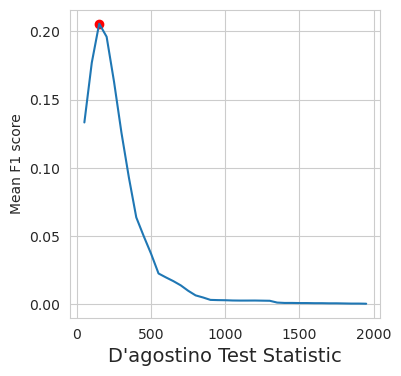

In [12]:
pca.reoptimize_thresholds()

In [13]:
# pca.recompute_thresholds(150)

In [14]:
imdb_gene_presence(pca)[0].to_csv('Presence_Matrices/PCA_Gene_Presence_Matrix.csv')

## Independent Principal Component Analysis

In [15]:
components_ipca = pd.read_csv('./Results/IPCA/components_ipca.csv', index_col=0)

In [16]:
activities_ipca = pd.read_csv('./Results/IPCA/loadings_variables_ipca.csv', index_col=0).T

In [17]:
activities_ipca

,p1k_00001,p1k_00002,p1k_00003,p1k_00004,p1k_00005,p1k_00006,p1k_00007,p1k_00008,p1k_00009,p1k_00010,...,p1k_01046,p1k_01047,p1k_01048,p1k_01049,p1k_01050,p1k_01051,p1k_01052,p1k_01053,p1k_01054,p1k_01055
IPC1,-0.000233,0.000190,0.000259,0.000049,-0.000076,-0.000232,-0.000097,-0.000431,0.000652,-0.000085,...,-0.001358,-0.001715,-0.001046,-0.001416,-0.000223,-0.029182,-0.000604,0.000150,0.000828,-0.000538
IPC2,-0.000046,0.000077,-0.000304,-0.000001,-0.000142,0.000255,-0.000392,0.000194,0.000392,-0.000300,...,-0.000147,0.002523,0.000325,0.000771,0.029039,-0.000055,-0.000631,0.000273,0.000943,-0.000658
IPC3,-0.000045,0.000081,0.000047,0.000221,-0.000181,-0.000247,-0.000374,-0.000094,-0.000204,0.000321,...,0.000432,-0.000834,-0.000148,-0.000295,-0.000107,-0.000151,0.000209,0.000427,-0.000644,0.000552
IPC4,-0.000080,0.000100,0.000300,0.000285,0.000184,0.000897,-0.000071,0.000556,-0.000349,-0.000484,...,0.000295,-0.000341,-0.000274,-0.000210,0.000092,-0.000007,0.000307,-0.000544,-0.000712,-0.000003
IPC5,-0.000323,0.000287,0.000034,0.000202,-0.000044,0.000050,-0.000126,0.000006,-0.000040,0.000033,...,-0.000051,-0.000119,-0.000247,-0.000073,0.000326,0.000568,-0.000067,-0.000393,0.000972,0.000365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IPC246,0.000092,-0.000085,-0.000205,-0.001252,-0.000435,-0.000889,0.000514,-0.000379,0.000331,0.000597,...,0.000366,0.000092,-0.001281,0.001436,-0.000002,-0.000012,0.000359,0.000509,0.001205,-0.000446
IPC247,0.000231,-0.000235,0.001024,0.001518,-0.000601,-0.000478,-0.001392,-0.001119,-0.000239,-0.000114,...,0.000787,-0.000714,0.001466,-0.000271,0.000034,0.000029,0.000102,-0.001399,0.000147,0.000196
IPC248,0.000161,-0.000141,0.000211,-0.000299,0.000924,0.000617,0.000198,-0.001335,0.000848,0.001242,...,0.000428,0.000811,-0.000674,-0.000310,-0.000051,0.000016,-0.000123,-0.000392,0.000098,-0.000514
IPC249,-0.000117,0.000101,0.000217,0.001844,0.000215,0.000293,-0.000818,-0.000419,0.001189,0.000474,...,0.000077,-0.000553,0.000710,-0.000033,-0.000002,0.000043,0.000754,0.001276,-0.000222,0.000252


In [18]:
ipca = IcaData(components_ipca,activities_ipca)

In [19]:
ipca.X = precise1k.X

In [20]:
ipca.gene_table = precise1k.gene_table
ipca.trn = precise1k.trn

In [21]:
ipca.cog_colors = precise1k.cog_colors

In [22]:
ipca.sample_table = ipca.sample_table

In [23]:
explained_variance(ipca)

0.00014441529368092176

  0%|          | 0/39 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.136491   0.553271  0.099650  0.193074
100   0.180921   0.519156  0.146493  0.230730
150   0.209201   0.471307  0.188583  0.250250
200   0.218466   0.413706  0.226852  0.253521
250   0.218330   0.364714  0.257894  0.251185
300   0.210528   0.317841  0.283817  0.242708
350   0.191952   0.271946  0.285711  0.222474
400   0.174470   0.233849  0.275110  0.201747
450   0.161953   0.202969  0.271257  0.186314
500   0.150854   0.180213  0.263073  0.174041
550   0.140794   0.161814  0.266026  0.165168
600   0.124240   0.140927  0.234801  0.145124
650   0.113926   0.124065  0.222107  0.134779
700   0.100077   0.109444  0.204775  0.119670
750   0.088124   0.094294  0.191433  0.106199
800   0.086147   0.088831  0.181883  0.102872
850   0.080712   0.082716  0.178367  0.097348
900   0.077981   0.078727  0.174224  0.094288
950   0.075457   0.075974  0.171167  0.091454
1000  0.074366   0.074234  0.165975  0.089642
1050  0.070799   0.070182  0.16037

200

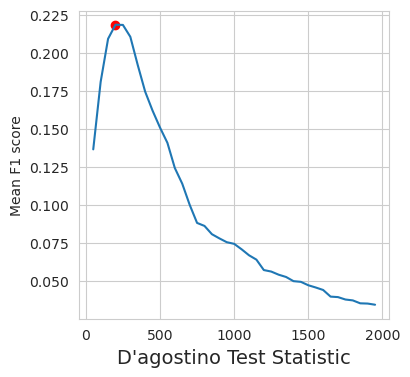

In [24]:
ipca.reoptimize_thresholds()

In [25]:
# ipca.recompute_thresholds(700)

In [26]:
imdb_gene_presence(ipca)[0].to_csv('Presence_Matrices/Independent_PCA_Gene_Presence_Matrix.csv')

## sparse IPCA

In [27]:
components_sipca = pd.read_csv('./Results/sIPCA/components_sipca.csv', index_col=0)

In [5]:
activities_sipca = pd.read_csv('./Results/sIPCA/loadings_variables_sipca.csv', index_col=0).T

In [29]:
components_sipca.columns = activities_sipca.index

In [30]:
sipca = IcaData(components_sipca,activities_sipca)

In [31]:
sipca.X = precise1k.X

In [32]:
sipca.gene_table = precise1k.gene_table
sipca.trn = precise1k.trn

In [33]:
sipca.cog_colors = precise1k.cog_colors

In [34]:
sipca.sample_table = sipca.sample_table

In [35]:
explained_variance(sipca)

0.00010286532068970455

  0%|          | 0/39 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.145890   0.557261  0.103538  0.201376
100   0.190346   0.514935  0.153165  0.238464
150   0.219717   0.467527  0.200717  0.260019
200   0.228697   0.409233  0.233011  0.261899
250   0.220004   0.349617  0.255881  0.249785
300   0.209468   0.310118  0.266216  0.238142
350   0.199015   0.277572  0.274590  0.227101
400   0.191173   0.252997  0.279059  0.219012
450   0.180216   0.226122  0.278797  0.206572
500   0.162360   0.197578  0.256976  0.185927
550   0.151338   0.175821  0.263740  0.175249
600   0.138049   0.156524  0.245929  0.160032
650   0.127315   0.141913  0.240200  0.148769
700   0.120619   0.131951  0.235171  0.141685
750   0.110693   0.117849  0.226487  0.131236
800   0.106040   0.110441  0.221910  0.126119
850   0.095582   0.099670  0.206178  0.114696
900   0.086320   0.087369  0.195142  0.104250
950   0.083438   0.083843  0.184544  0.100362
1000  0.080799   0.081559  0.179960  0.096797
1050  0.078608   0.078193  0.18347

200

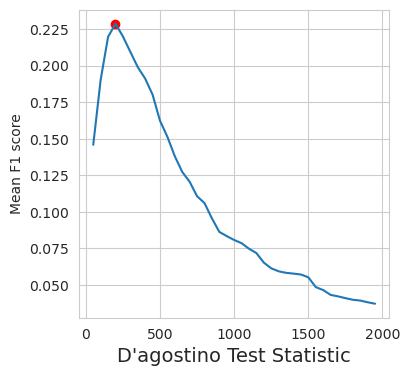

In [36]:
sipca.reoptimize_thresholds()

In [37]:
# sipca.recompute_thresholds(200)

In [38]:
imdb_gene_presence(sipca)[0].to_csv('Presence_Matrices/Sparse_Independent_PCA_Gene_Presence_Matrix.csv')

## Factor Analysis

In [39]:
components_factor_analysis = pd.read_csv('./Results/Factor_Analysis/M_Factor_Analysis.csv', index_col=0)

In [40]:
activities_factor_analysis = pd.read_csv('./Results/Factor_Analysis/A_Factor_Analysis.csv', index_col=0).T

In [41]:
factor_analysis = IcaData(components_factor_analysis,activities_factor_analysis)

In [42]:
factor_analysis.X = precise1k.X

In [43]:
factor_analysis.gene_table = precise1k.gene_table
factor_analysis.trn = precise1k.trn

In [44]:
factor_analysis.cog_colors = precise1k.cog_colors

In [45]:
factor_analysis.sample_table = precise1k.sample_table

In [46]:
explained_variance(factor_analysis)

0.9729593694263614

  0%|          | 0/39 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.140872   0.606470  0.111253  0.206503
100   0.184971   0.524117  0.158804  0.238206
150   0.204066   0.420871  0.196125  0.240690
200   0.198211   0.316345  0.208392  0.219363
250   0.167775   0.210251  0.220065  0.181291
300   0.125922   0.134844  0.198636  0.136034
350   0.090778   0.086031  0.182381  0.103010
400   0.062963   0.055490  0.153779  0.075631
450   0.043561   0.036234  0.141752  0.056320
500   0.033805   0.028079  0.097488  0.042130
550   0.022125   0.017172  0.079229  0.030209
600   0.015037   0.012003  0.056450  0.020736
650   0.012652   0.009221  0.051646  0.017649
700   0.012152   0.008801  0.051675  0.017087
750   0.009978   0.007112  0.056839  0.014970
800   0.009620   0.006802  0.043810  0.013655
850   0.007763   0.005618  0.031418  0.010614
900   0.007701   0.005527  0.032841  0.010635
950   0.007206   0.005166  0.035008  0.010156
1000  0.006980   0.004931  0.036642  0.009881
1050  0.006590   0.004582  0.03656

150

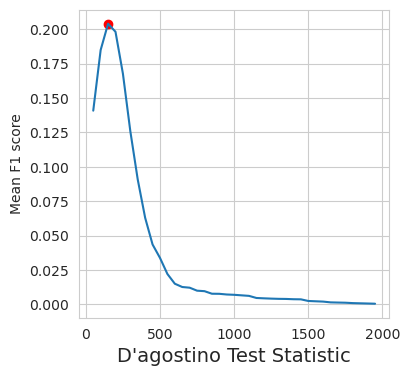

In [47]:
factor_analysis.reoptimize_thresholds()

In [48]:
# factor_analysis.recompute_thresholds(150)

In [49]:
imdb_gene_presence(factor_analysis)[0].to_csv('Presence_Matrices/Factor_Analysis_Gene_Presence_Matrix.csv')

## Dictionary Learning

In [50]:
components_dictionary_learning = pd.read_csv('./Results/Dictionary_Learning/M_Dictionary_Learning.csv', index_col=0)

In [51]:
activities_dictionary_learning = pd.read_csv('./Results/Dictionary_Learning/A_Dictionary_Learning.csv', index_col=0).T

In [52]:
components_dictionary_learning

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_241,Component_242,Component_243,Component_244,Component_245,Component_246,Component_247,Component_248,Component_249,Component_250
b0002,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.332455,-0.012885,...,0.000000,0.0,0.000000,-0.803449,0.0,0.000000,0.000000,0.000000,0.000000,-0.157791
b0003,0.000000,0.0,-0.512496,-4.995340,0.000000,0.000000,0.000000,-0.873284,3.923061,-1.026998,...,0.000000,0.0,0.000000,0.374250,0.0,-0.760842,0.000000,0.000000,-0.479683,0.000000
b0004,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.155243,0.000000,...,0.000000,0.0,0.000000,0.454749,0.0,-1.227517,2.704451,0.000000,0.000000,1.090367
b0005,0.000000,0.0,1.402772,0.000000,-9.751291,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.191330,0.707844,0.0,-0.881271,0.000000,-3.760684,-1.699891,0.000000
b0006,0.000000,0.0,0.000000,-3.977956,0.000000,0.000000,0.000000,3.413430,-1.403647,0.000000,...,1.418743,0.0,0.000000,-1.059460,0.0,-2.462772,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4747,9.764850,0.0,0.000000,7.122166,0.000000,32.040044,0.000000,12.407196,0.000000,2.092766,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-14.472992,-5.135758,-8.564844
b4748,0.000000,0.0,0.000000,-3.851226,10.407063,50.138112,0.000000,-1.561043,0.000000,-0.024942,...,0.000000,0.0,-2.327014,-0.921918,0.0,0.438012,0.000000,-6.786830,3.279145,-4.541343
b4751,15.666948,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,-0.296069,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
b4755,0.000000,0.0,0.000000,0.000000,-5.115456,-5.539600,0.000000,0.000000,0.000000,-0.184897,...,-6.583586,0.0,2.740284,0.000000,0.0,-1.916738,-2.641991,0.000000,1.216197,0.000000


In [53]:
components_dictionary_learning = replace_zeros_with_random(components_dictionary_learning)

In [54]:
dictionary_learning = IcaData(components_dictionary_learning,activities_dictionary_learning)

In [55]:
dictionary_learning.X = precise1k.X

In [56]:
dictionary_learning.gene_table = precise1k.gene_table
dictionary_learning.trn = precise1k.trn

In [57]:
dictionary_learning.cog_colors = precise1k.cog_colors

In [58]:
dictionary_learning.sample_table = precise1k.sample_table

In [59]:
explained_variance(dictionary_learning)

0.9031467554930135

  0%|          | 0/39 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.082982   0.755992  0.058360  0.084220
100   0.109456   0.691595  0.083538  0.117320
150   0.133602   0.645658  0.112345  0.144417
200   0.155778   0.619661  0.143300  0.170707
250   0.176568   0.595393  0.174967  0.192340
300   0.200337   0.575183  0.209920  0.216978
350   0.221474   0.553311  0.244246  0.240357
400   0.241069   0.531900  0.278612  0.259786
450   0.253291   0.516061  0.308960  0.273417
500   0.259313   0.488594  0.329603  0.279058
550   0.264978   0.468320  0.346213  0.286422
600   0.272981   0.454515  0.367318  0.296563
650   0.279011   0.435281  0.384345  0.303798
700   0.286615   0.422499  0.406229  0.314359
750   0.295050   0.413664  0.426450  0.323831
800   0.300722   0.404852  0.445634  0.330857
850   0.307596   0.400895  0.462794  0.338051
900   0.317277   0.397300  0.478581  0.347787
950   0.323297   0.389163  0.498959  0.354480
1000  0.325247   0.376154  0.511504  0.355926
1050  0.327816   0.368311  0.52634

1200

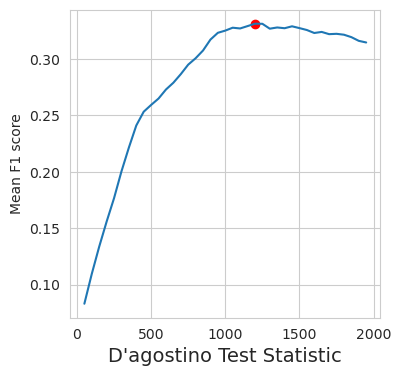

In [60]:
dictionary_learning.reoptimize_thresholds()

In [61]:
# dictionary_learning.recompute_thresholds(200)

In [62]:
imdb_gene_presence(dictionary_learning)[0].to_csv('Presence_Matrices/Dictionary_Learning_Gene_Presence_Matrix.csv')

<AxesSubplot:xlabel='Gene Start', ylabel='Component_190 Gene Weight'>

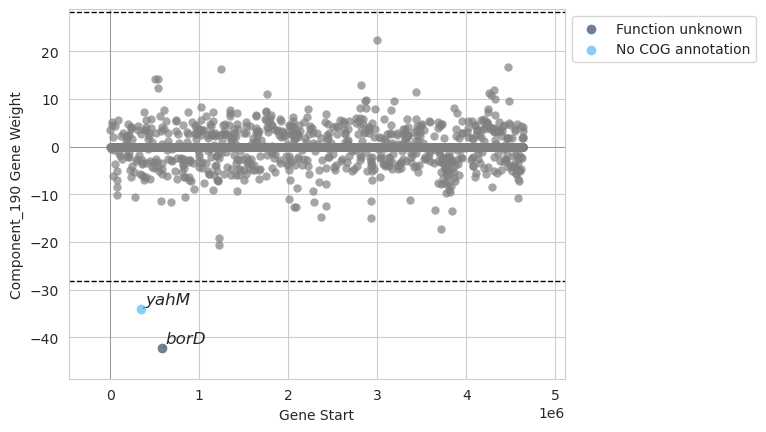

In [63]:
plot_gene_weights(dictionary_learning, 'Component_190')

## SparseCoder

In [64]:
components_SparseCoder = pd.read_csv('./Results/SparseCoder/M_SparseCoder.csv', index_col=0)

In [65]:
activities_SparseCoder = pd.read_csv('./Results/SparseCoder/A_SparseCoder.csv', index_col=0).T

In [66]:
components_SparseCoder = replace_zeros_with_random(components_SparseCoder)

In [67]:
SparseCoder = IcaData(components_SparseCoder,activities_SparseCoder)

In [68]:
SparseCoder.X = precise1k.X

In [69]:
SparseCoder.gene_table = precise1k.gene_table
SparseCoder.trn = precise1k.trn

In [70]:
SparseCoder.cog_colors = precise1k.cog_colors

In [71]:
SparseCoder.sample_table = precise1k.sample_table

In [72]:
explained_variance(SparseCoder)

0.9031480655064196

  0%|          | 0/39 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.083080   0.743974  0.058488  0.083314
100   0.108316   0.682805  0.083922  0.117160
150   0.132576   0.642318  0.112789  0.144580
200   0.155656   0.620208  0.143233  0.170206
250   0.176451   0.596235  0.174883  0.191784
300   0.200304   0.574450  0.209871  0.216733
350   0.221403   0.553781  0.244166  0.239709
400   0.241033   0.531925  0.278605  0.259479
450   0.253221   0.516312  0.308920  0.273176
500   0.259268   0.489865  0.329562  0.278936
550   0.264926   0.469012  0.346176  0.286265
600   0.272950   0.453737  0.367295  0.296388
650   0.279042   0.431738  0.384361  0.303877
700   0.286610   0.421750  0.406222  0.314376
750   0.295038   0.413264  0.426438  0.323832
800   0.300698   0.404560  0.445617  0.330861
850   0.307563   0.400763  0.462770  0.338061
900   0.317258   0.397601  0.478565  0.347778
950   0.323183   0.388740  0.498907  0.354246
1000  0.325162   0.376713  0.511440  0.355733
1050  0.327680   0.368007  0.52625

1250

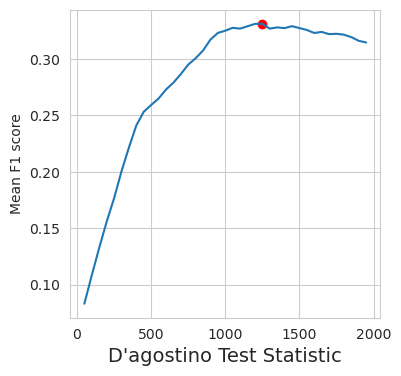

In [73]:
SparseCoder.reoptimize_thresholds()

In [74]:
# SparseCoder.recompute_thresholds(200)

In [75]:
imdb_gene_presence(SparseCoder)[0].to_csv('Presence_Matrices/SparseCoder_Gene_Presence_Matrix.csv')

## Incremental Principal Component Analysis

In [76]:
components_incremental_pca = pd.read_csv('./Results/IncrementalPCA/M_IncrementalPCA.csv', index_col=0)

In [77]:
activities_incremental_pca = pd.read_csv('./Results/IncrementalPCA/A_IncrementalPCA.csv', index_col=0).T

In [78]:
incremental_pca = IcaData(components_incremental_pca,activities_incremental_pca)

In [79]:
incremental_pca.X = precise1k.X

In [80]:
incremental_pca.gene_table = precise1k.gene_table
incremental_pca.trn = precise1k.trn

In [81]:
incremental_pca.cog_colors = precise1k.cog_colors

In [82]:
incremental_pca.sample_table = precise1k.sample_table

In [83]:
explained_variance(incremental_pca)

0.9776315813713764

  0%|          | 0/39 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.131371   0.522615  0.103440  0.185390
100   0.175628   0.463173  0.155213  0.220908
150   0.202747   0.372706  0.210040  0.232855
200   0.192474   0.274644  0.245018  0.214267
250   0.159352   0.185674  0.244088  0.175962
300   0.125458   0.126767  0.234186  0.140229
350   0.093622   0.083894  0.211541  0.108979
400   0.063431   0.054780  0.129923  0.072251
450   0.050027   0.041953  0.107333  0.058398
500   0.037032   0.028138  0.097001  0.045361
550   0.022659   0.016915  0.065749  0.027933
600   0.019783   0.014238  0.051480  0.023646
650   0.017058   0.011668  0.050788  0.021314
700   0.013956   0.009209  0.041915  0.017911
750   0.009994   0.006329  0.034656  0.013452
800   0.006625   0.003985  0.029233  0.009846
850   0.005096   0.003077  0.026389  0.007671
900   0.003326   0.001990  0.023209  0.005385
950   0.003163   0.001895  0.016532  0.004661
1000  0.003078   0.001840  0.016471  0.004585
1050  0.002884   0.001732  0.00945

150

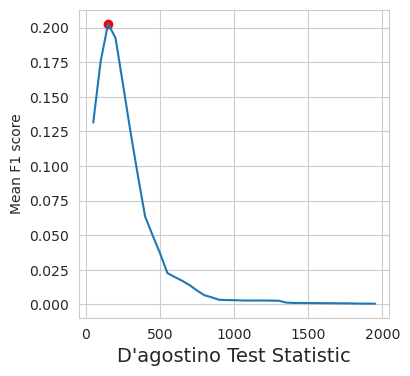

In [84]:
incremental_pca.reoptimize_thresholds()

In [85]:
# incremental_pca.recompute_thresholds(150)

In [86]:
imdb_gene_presence(incremental_pca)[0].to_csv('Presence_Matrices/Incremental_PCA_Gene_Presence_Matrix.csv')

## FastICA

In [87]:
components_Fast_ICA = pd.read_csv('./Results/Fast_ICA/M_Fast_ICA.csv', index_col=0)

In [88]:
activities_Fast_ICA = pd.read_csv('./Results/Fast_ICA/A_Fast_ICA.csv', index_col=0).T

In [89]:
Fast_ICA = IcaData(components_Fast_ICA,activities_Fast_ICA)

In [90]:
Fast_ICA.X = precise1k.X

In [91]:
Fast_ICA.gene_table = precise1k.gene_table
Fast_ICA.trn = precise1k.trn

In [92]:
Fast_ICA.cog_colors = precise1k.cog_colors

In [93]:
Fast_ICA.sample_table = precise1k.sample_table

In [94]:
explained_variance(Fast_ICA)

0.9776315813713764

  0%|          | 0/39 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.179939   0.580238  0.149625  0.230156
100   0.230118   0.551716  0.211850  0.279942
150   0.275950   0.538047  0.272532  0.320988
200   0.313797   0.523233  0.333168  0.354705
250   0.340308   0.488906  0.387339  0.375044
300   0.352201   0.459521  0.427924  0.384328
350   0.359135   0.435279  0.460615  0.389958
400   0.360202   0.414180  0.488946  0.391613
450   0.362253   0.398402  0.511655  0.393693
500   0.363222   0.388517  0.527738  0.395102
550   0.363990   0.381042  0.538577  0.396285
600   0.363951   0.372035  0.559255  0.397580
650   0.363874   0.364629  0.576229  0.398643
700   0.364539   0.361414  0.583749  0.399736
750   0.359874   0.353338  0.588104  0.396026
800   0.357652   0.349073  0.592983  0.394462
850   0.355029   0.341329  0.601576  0.392727
900   0.350389   0.334130  0.601900  0.388362
950   0.346527   0.327405  0.604540  0.385124
1000  0.344169   0.324307  0.605894  0.382748
1050  0.340529   0.318281  0.61101

700

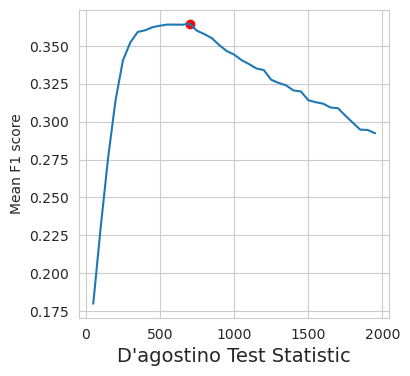

In [95]:
Fast_ICA.reoptimize_thresholds()

In [96]:
# Fast_ICA.recompute_thresholds(650)

In [97]:
imdb_gene_presence(Fast_ICA)[0].to_csv('Presence_Matrices/Fast_ICA_Gene_Presence_Matrix.csv')

## Sparse ICA

In [4]:
components_Sparse_ICA = pd.read_csv('./Results/Sparse_ICA_R/Dim_250/S_sparse_ICA_0_8.csv')

In [5]:
activities_Sparse_ICA = pd.read_csv('./Results/Sparse_ICA_R/Dim_250/A_sparse_ICA_0_8.csv')

In [6]:
import random

def replace_zeros_with_random(df):
    # Define a function that replaces 0 with a random value between 0 and 0.01
    def replace_value(x):
        return random.uniform(0, 0.01) if x == 0 else x
    
    # Apply this function to every element in the dataframe
    df = df.applymap(replace_value)
    return df

In [7]:
components_Sparse_ICA = replace_zeros_with_random(components_Sparse_ICA)

In [8]:
activities_Sparse_ICA.index = components_Sparse_ICA.columns

In [9]:
components_Sparse_ICA.index = precise1k.X.index

In [10]:
Sparse_ICA = IcaData(components_Sparse_ICA,activities_Sparse_ICA)

In [11]:
Sparse_ICA.X = precise1k.X

In [12]:
Sparse_ICA.gene_table = precise1k.gene_table
Sparse_ICA.trn = precise1k.trn

In [13]:
Sparse_ICA.cog_colors = precise1k.cog_colors

In [14]:
Sparse_ICA.sample_table = precise1k.sample_table

In [15]:
explained_variance(Sparse_ICA)

0.7484750160887507

  0%|          | 0/59 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.075144   0.677811  0.055868  0.103332
100   0.085011   0.648915  0.062953  0.119152
150   0.088860   0.645719  0.065162  0.125292
200   0.091409   0.645533  0.066680  0.129156
250   0.091508   0.644405  0.066759  0.129285
300   0.094293   0.641627  0.069955  0.132097
350   0.095139   0.641033  0.070424  0.133405
400   0.095219   0.641022  0.070514  0.133520
450   0.095303   0.641003  0.070592  0.133629
500   0.095370   0.640930  0.070664  0.133716
550   0.095447   0.640930  0.070735  0.133814
600   0.095586   0.640930  0.070848  0.133981
650   0.095612   0.640893  0.070867  0.134033
700   0.095682   0.640893  0.070916  0.134137
750   0.095803   0.640843  0.071023  0.134273
800   0.095992   0.640843  0.071133  0.134621
850   0.096347   0.638883  0.071364  0.135077
900   0.098239   0.635288  0.073496  0.139288
950   0.102869   0.626027  0.078587  0.146308
1000  0.112466   0.613326  0.087051  0.157824
1050  0.122430   0.603698  0.09863

2600

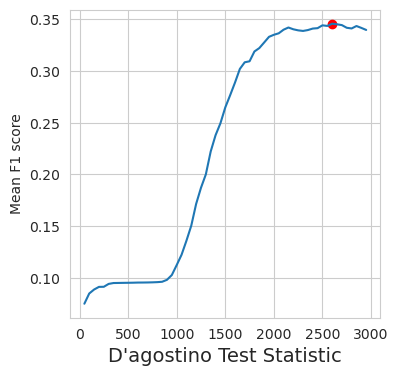

In [16]:
Sparse_ICA.reoptimize_thresholds()

In [18]:
# Sparse_ICA.recompute_thresholds(650)

In [19]:
imdb_gene_presence(Sparse_ICA)[0].to_csv('Presence_Matrices/Sparse_ICA_Gene_Presence_Matrix.csv')

## InfoMax ICA

In [113]:
components_InfoMax_ICA = pd.read_csv('./Results/InfoMax_ICA/proc_S.csv').T

In [114]:
components_InfoMax_ICA.index = precise1k.X.index

In [115]:
activities_InfoMax_ICA = pd.read_csv('./Results/InfoMax_ICA/proc_A.csv')

In [116]:
activities_InfoMax_ICA.columns = precise1k.X.columns

In [117]:
components_InfoMax_ICA.columns = activities_InfoMax_ICA.index

In [118]:
InfoMax_ICA = IcaData(components_InfoMax_ICA,activities_InfoMax_ICA)

In [119]:
InfoMax_ICA.X = precise1k.X

In [120]:
InfoMax_ICA.gene_table = precise1k.gene_table
InfoMax_ICA.trn = precise1k.trn

In [121]:
InfoMax_ICA.cog_colors = precise1k.cog_colors

In [122]:
InfoMax_ICA.sample_table = precise1k.sample_table

In [123]:
explained_variance(InfoMax_ICA)

0.665104016836261

  0%|          | 0/39 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.138086   0.668164  0.109450  0.177415
100   0.182580   0.570826  0.161960  0.226367
150   0.214274   0.517817  0.214882  0.256769
200   0.231592   0.462926  0.255479  0.270511
250   0.242075   0.415817  0.282822  0.276325
300   0.239580   0.364683  0.317783  0.272859
350   0.227561   0.313309  0.341186  0.260355
400   0.206505   0.262773  0.334778  0.238461
450   0.178265   0.215261  0.332309  0.210556
500   0.159284   0.186320  0.311427  0.189423
550   0.144886   0.161378  0.291177  0.173351
600   0.126618   0.136399  0.268462  0.152007
650   0.113066   0.113384  0.257437  0.136233
700   0.102383   0.100226  0.236117  0.122267
750   0.093071   0.087713  0.219834  0.112196
800   0.084967   0.077692  0.202334  0.102206
850   0.074375   0.066623  0.176002  0.089262
900   0.065262   0.058687  0.149664  0.078118
950   0.062808   0.054361  0.147673  0.075287
1000  0.057515   0.048555  0.139478  0.068950
1050  0.050485   0.042232  0.12397

250

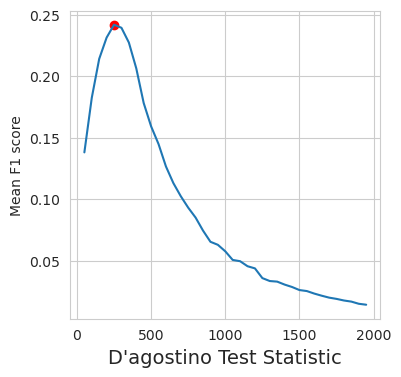

In [124]:
InfoMax_ICA.reoptimize_thresholds()

In [125]:
# InfoMax_ICA.recompute_thresholds(200)

In [126]:
imdb_gene_presence(InfoMax_ICA)[0].to_csv('Presence_Matrices/InfoMax_ICA_Gene_Presence_Matrix.csv')

## NMF

In [139]:
components_NMF = pd.read_csv('./Results/NMF/M_NMF.csv', index_col=0)

In [140]:
activities_NMF = pd.read_csv('./Results/NMF/A_NMF.csv', index_col=0).T

In [141]:
components_NMF = replace_zeros_with_random(components_NMF)

In [142]:
NMF = IcaData(components_NMF,activities_NMF)

In [143]:
NMF.X = precise1k.log_tpm

In [144]:
NMF.gene_table = precise1k.gene_table
NMF.trn = precise1k.trn

In [145]:
NMF.cog_colors = precise1k.cog_colors

In [146]:
NMF.sample_table = precise1k.sample_table

In [147]:
explained_variance(NMF)

0.0

  0%|          | 0/39 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.039153   0.945119  0.021788  0.017513
100   0.040310   0.913043  0.024610  0.024927
150   0.047232   0.882140  0.034025  0.039543
200   0.063164   0.801805  0.060972  0.074298
250   0.091401   0.717887  0.091323  0.118298
300   0.124823   0.632670  0.129072  0.162816
350   0.151623   0.570835  0.149030  0.193923
400   0.170990   0.532144  0.176323  0.217050
450   0.184400   0.506490  0.196882  0.230565
500   0.188576   0.489267  0.206980  0.233667
550   0.196045   0.474242  0.223146  0.239982
600   0.200265   0.457486  0.228653  0.242425
650   0.201671   0.438754  0.234849  0.241623
700   0.209079   0.426083  0.250197  0.248198
750   0.215226   0.411860  0.261213  0.253129
800   0.217101   0.396656  0.270182  0.253823
850   0.215281   0.377306  0.277317  0.251117
900   0.218582   0.366246  0.294593  0.254393
950   0.215269   0.351351  0.300054  0.249823
1000  0.216957   0.338791  0.301549  0.249367
1050  0.217113   0.327350  0.29426

900

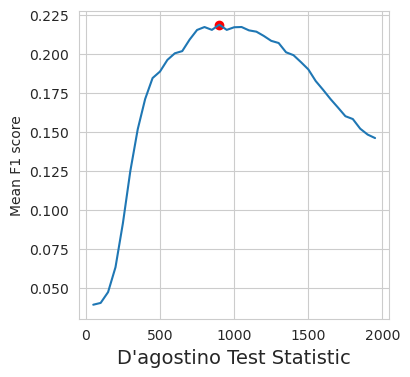

In [148]:
NMF.reoptimize_thresholds()

In [149]:
# NMF.recompute_thresholds(200)

In [150]:
imdb_gene_presence(NMF)[0].to_csv('Presence_Matrices/NMF_Gene_Presence_Matrix.csv')

## Picard ICA

In [5]:
components_Picard_ICA = pd.read_csv('./Results/Picard_ICA/proc_S.csv').T

In [6]:
components_Picard_ICA.index = precise1k.X.index

In [7]:
activities_Picard_ICA = pd.read_csv('./Results/Picard_ICA/proc_A.csv')

In [8]:
activities_Picard_ICA.columns = precise1k.X.columns

In [9]:
components_Picard_ICA.columns = activities_Picard_ICA.index

In [12]:
Picard_ICA = IcaData(components_Picard_ICA,activities_Picard_ICA)

In [13]:
Picard_ICA.X = precise1k.X

In [14]:
Picard_ICA.gene_table = precise1k.gene_table
Picard_ICA.trn = precise1k.trn

In [15]:
Picard_ICA.cog_colors = precise1k.cog_colors

In [16]:
Picard_ICA.sample_table = precise1k.sample_table

In [17]:
explained_variance(Picard_ICA)

0.6651040168362611

  0%|          | 0/59 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
50    0.130468   0.684108  0.104193  0.167524
100   0.172942   0.608678  0.150495  0.218429
150   0.198355   0.557515  0.189816  0.245276
200   0.222651   0.518402  0.233283  0.267982
250   0.239524   0.481927  0.262162  0.280335
300   0.244736   0.436077  0.286379  0.280999
350   0.240975   0.394307  0.302539  0.275808
400   0.225850   0.346531  0.312024  0.260394
450   0.222491   0.310054  0.324684  0.254554
500   0.205922   0.266883  0.334832  0.237452
550   0.181960   0.224974  0.293479  0.208319
600   0.168861   0.201034  0.293037  0.194776
650   0.158015   0.179432  0.267508  0.179548
700   0.146389   0.158359  0.263295  0.166914
750   0.129662   0.136409  0.246810  0.148776
800   0.121627   0.125319  0.232554  0.139339
850   0.115215   0.113260  0.228220  0.132480
900   0.106670   0.104779  0.207224  0.121598
950   0.102366   0.098185  0.208579  0.117648
1000  0.097630   0.093094  0.182056  0.110833
1050  0.091420   0.085529  0.17935

300

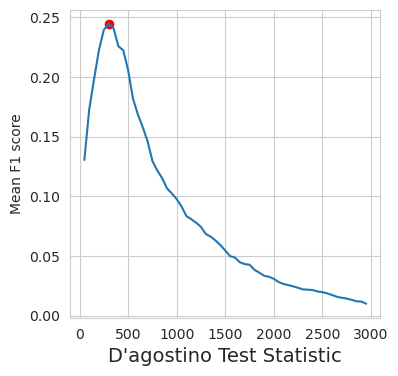

In [18]:
Picard_ICA.reoptimize_thresholds()

In [19]:
# Picard_ICA.recompute_thresholds(200)

In [20]:
imdb_gene_presence(Picard_ICA)[0].to_csv('Presence_Matrices/Picard_ICA_Gene_Presence_Matrix.csv')

## ISA

In [12]:
components_ISA = pd.read_csv('./Results/ISA/ISA_Components.csv', index_col=0)

In [13]:
activities_ISA = pd.read_csv('./Results/sIPCA/loadings_variables_sipca.csv', index_col=0).T

In [16]:
activities_ISA.index = components_ISA.columns

In [18]:
activities_ISA

,p1k_00001,p1k_00002,p1k_00003,p1k_00004,p1k_00005,p1k_00006,p1k_00007,p1k_00008,p1k_00009,p1k_00010,...,p1k_01046,p1k_01047,p1k_01048,p1k_01049,p1k_01050,p1k_01051,p1k_01052,p1k_01053,p1k_01054,p1k_01055
Component_1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,-0.000684,-0.001041,-0.000372,-0.000741,0.000000,-0.028508,0.0,0.0,0.000154,0.0
Component_2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.001839,0.000000,0.000087,0.028355,0.000000,0.0,0.0,0.000259,0.0
Component_3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,-0.000161,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
Component_4,0.000000,0.000000,0.0,0.0,0.000000,0.000152,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
Component_5,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000218,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Component_246,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
Component_247,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
Component_248,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
Component_249,-0.170491,-0.203638,0.0,0.0,-0.011931,-0.009574,0.0,0.001315,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [17]:
components_ISA

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_241,Component_242,Component_243,Component_244,Component_245,Component_246,Component_247,Component_248,Component_249,Component_250
b0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b0006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.737227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b4748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b4751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b4755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
ISA = IcaData(components_ISA,activities_ISA)

In [20]:
ISA.X = precise1k.X

In [21]:
ISA.gene_table = precise1k.gene_table
ISA.trn = precise1k.trn

In [22]:
ISA.cog_colors = precise1k.cog_colors

In [23]:
ISA.sample_table = ISA.sample_table

In [24]:
explained_variance(ISA)

0.0

  0%|          | 0/50 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
2500  0.185101   0.357083  0.211258  0.214853
2550  0.185101   0.357083  0.211258  0.214853
2600  0.185101   0.357083  0.211258  0.214853
2650  0.185101   0.357083  0.211258  0.214853
2700  0.185101   0.357083  0.211258  0.214853
2750  0.185101   0.357083  0.211258  0.214853
2800  0.185101   0.357083  0.211258  0.214853
2850  0.185101   0.357083  0.211258  0.214853
2900  0.185101   0.357083  0.211258  0.214853
2950  0.185101   0.357083  0.211258  0.214853
3000  0.185101   0.357083  0.211258  0.214853
3050  0.185101   0.357083  0.211258  0.214853
3100  0.185101   0.357083  0.211258  0.214853
3150  0.185101   0.357083  0.211258  0.214853
3200  0.185101   0.357083  0.211258  0.214853
3250  0.185101   0.357083  0.211258  0.214853
3300  0.185101   0.357083  0.211258  0.214853
3350  0.185101   0.357083  0.211258  0.214853
3400  0.185101   0.357083  0.211258  0.214853
3450  0.185101   0.357083  0.211258  0.214853
3500  0.185101   0.357083  0.21125

2500

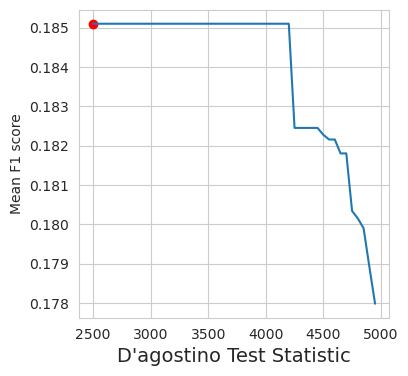

In [25]:
ISA.reoptimize_thresholds()

In [26]:
# ISA.recompute_thresholds(200)

In [27]:
imdb_gene_presence(ISA)[0].to_csv('Presence_Matrices/ISA_Gene_Presence_Matrix.csv')